In [1]:
import cv2 #opencv
import numpy as np
import matplotlib.pyplot as plt

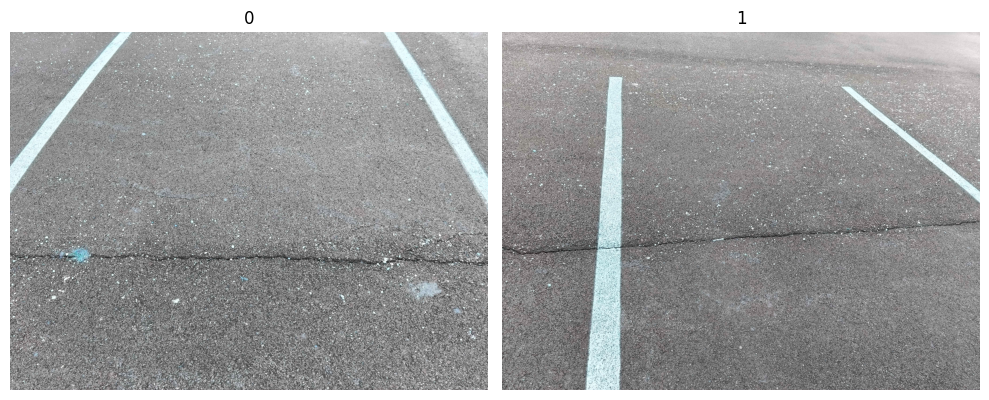

In [5]:
image_paths = [
    "data/parking_lot1.jpg",
    "data/parking_lot2.jpg"
]

images = [np.copy(cv2.imread(p)) for p in image_paths]

cols = 2
rows = int(np.ceil(len(images) / cols))

plt.figure(figsize=(10, 5))

for i, img in enumerate(images):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img)
    plt.title(f"{i}")
    plt.axis("off")

plt.tight_layout()
plt.show()

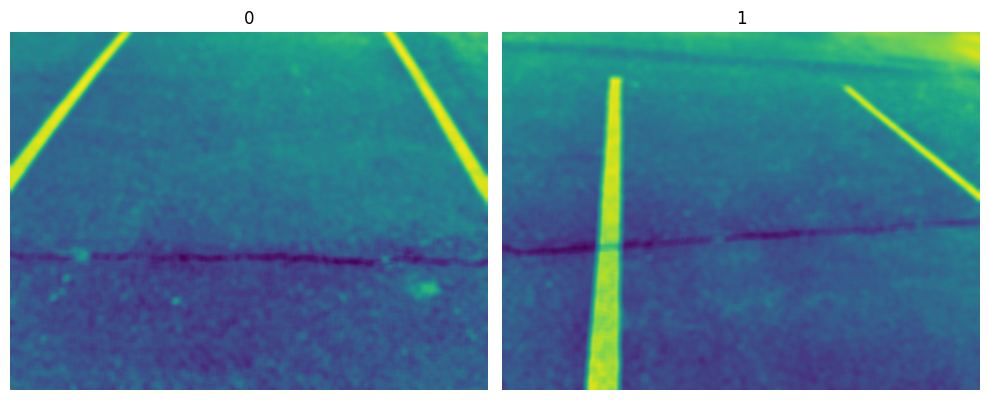

In [7]:
gray = [cv2.cvtColor(i,cv2.COLOR_RGB2GRAY) for i in images]
blur = [cv2.GaussianBlur(i,(67,67),33,33) for i in gray]

plt.figure(figsize=(10, 5))

for i, img in enumerate(blur):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img)
    plt.title(f"{i}")
    plt.axis("off")

plt.tight_layout()
plt.show()

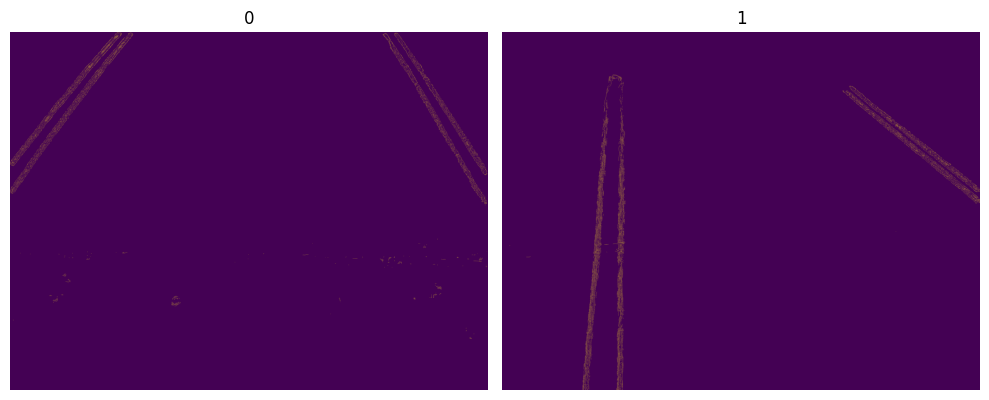

In [8]:
canny = [cv2.Canny(i, 15, 10) for i in blur]

plt.figure(figsize=(10, 5))

for i, img in enumerate(canny):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img)
    plt.title(f"{i}")
    plt.axis("off")

plt.tight_layout()
plt.show()

In [9]:
def display_lines(image, lines):
    line_image = np.zeros_like(image)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line.reshape(4)
            cv2.line(line_image,(x1, y1), (x2, y2), (0, 255 , 255), 10)
    return line_image

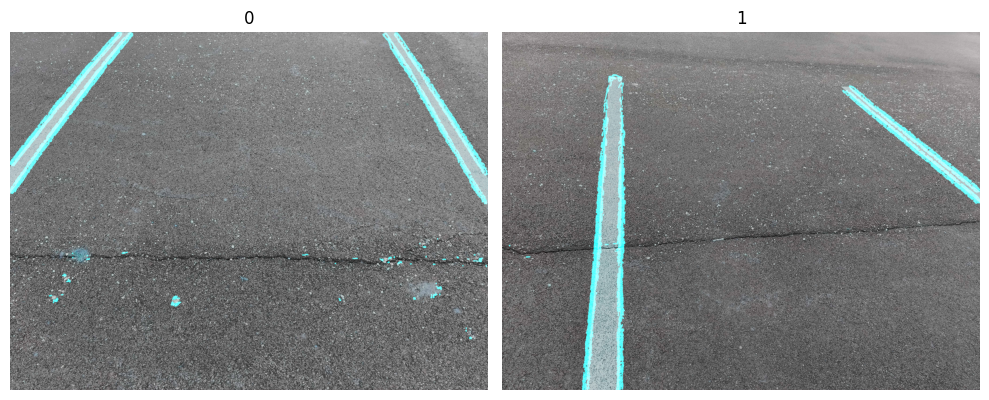

In [10]:
lines = [cv2.HoughLinesP(i, 2, np.pi/180, 10, np.array([]), minLineLength = 4, maxLineGap = 5) for i in canny]
line_image = [display_lines(images[i], line) for i,line in enumerate(lines)]
result = [cv2.addWeighted(images[i], 0.8, line, 1, 1) for i,line in enumerate(line_image)]

plt.figure(figsize=(10, 5))

for i, img in enumerate(result):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img)
    plt.title(f"{i}")
    plt.axis("off")

plt.tight_layout()
plt.show()